In [1]:
import collections

In [2]:
from pylab import *

In [3]:
import matplotlib
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
ρ = 1
a = 10
b = 1
c = 2
x = 10

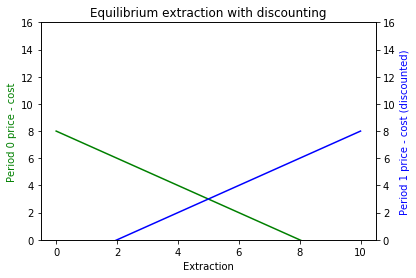

In [6]:
y0 = np.linspace(0, 10, 2)
p0 = a - b*y0 - c
y1 = np.linspace(0, 10, 2)
p1 = ρ*(a - b*(x-y0)-c)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(y0, p0, 'g-')
ax2.plot(y1, p1, 'b-')

ax1.set_xlabel('Extraction')
ax1.set_ylabel('Period 0 price - cost', color='g')
ax2.set_ylabel('Period 1 price - cost (discounted)', color='b')

ax1.set_ylim([0,16])
ax2.set_ylim([0,16])

title('Equilibrium extraction with discounting')
show()

Text(0.5, 1.0, 'Initial price and termination time')

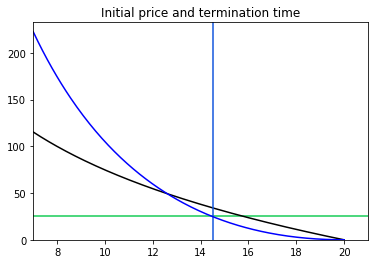

In [7]:
from scipy.interpolate import make_interp_spline, BSpline
import math
import scipy.integrate as integrate


x_0 = 25
r = 0.01
a = 20
c = 1
b = 4

fig, axes = plt.subplots()

Tlist = []

p0 = np.linspace(7,a,200)
for i in p0 :
    T = (1/r)*(np.log((a-c)/(i-c)))
    Tlist.append(T)
plt.axhline(y=x_0, color="#15cc55")
plt.plot(p0, Tlist, label="..",color='black')

linedrawn = False

def totalapples(price) :
    global linedrawn
    T = (1/r)*(np.log((a-c)/(price-c)))
    totalapples = integrate.quad((lambda x: 1/b*(a-((math.exp(r*x))*(price-c)+c))), 0, T)
    if totalapples[0] <= x_0 and not linedrawn:
        plt.axvline(x=price, color="#1155dd")
        linedrawn = True
    #calculate total apples from price and store it in total apples
    return totalapples[0]

applelist = []
for price in p0 :
    applelist.append(totalapples(price))

plt.plot(p0, applelist, label="..",color='blue')

plt.xlim(7, a+1)
plt.ylim(0,applelist[0]+10)

title('Initial price and termination time')

#Print the p_0 equilibrium below the graph
#label the curves and axes
#Legend for blue, black, lightblue and green curves
#Make a second graph with t on x-axis and pt on y-axis to show the price trajectory as a function of initial price p0.